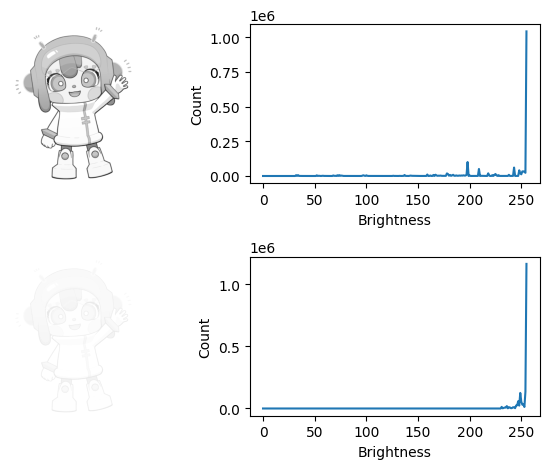

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("picody_gray.png", cv2.IMREAD_GRAYSCALE)

# print(image)

histogram1 = cv2.calcHist([image], [0], None, [256], [0, 256])

lower = 230
upper = 255

result = np.zeros_like(image)
cv2.normalize(
    src=image,
    dst=result,
    alpha=lower,
    beta=upper,
    norm_type=cv2.NORM_MINMAX,
    dtype=cv2.CV_8U,
    mask=None,
)

histogram2 = cv2.calcHist([result], [0], None, [256], [0, 256])

plt.subplot(221)
plt.imshow(image, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.subplot(222)
plt.plot(histogram1)
plt.xlabel("Brightness")
plt.ylabel("Count")

plt.subplot(223)
plt.imshow(result, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.subplot(224)
plt.plot(histogram2)
plt.xlabel("Brightness")
plt.ylabel("Count")

plt.tight_layout()

cv2.imwrite("picody_gray_normalized.png", result)

plt.show()
